#  Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.neighbors import KNeighborsClassifier as knn
import sklearn.linear_model as skl_lm

%matplotlib inline

In [2]:
Smarket =pd.read_csv('./data/Smarket.csv',index_col=[0])
Smarket.columns
 

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [3]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [4]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


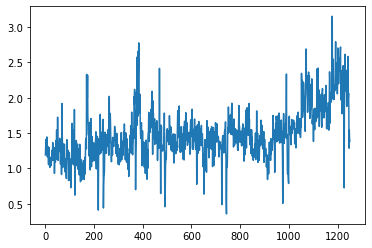

In [5]:
plt.plot(Smarket.Volume)

In [6]:
model = smf.glm('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 28 Apr 2021   Deviance:                       1727.6
Time:                                          10:48:29   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [7]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()

Coefficeients
Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

p-Values
Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64



In [8]:
predictions = result.predict()
print(predictions[0:10])

[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


In [9]:
print(result.model.endog_names)

['Direction[Down]', 'Direction[Up]']


In [10]:
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(predictions_nominal,Smarket["Direction"]))

[[145 141]
 [457 507]]


In [12]:
print(accuracy_score(Smarket["Direction"],predictions_nominal))

0.5216


In [13]:
x_train = Smarket[Smarket.Year < 2005][:]
y_train = Smarket[Smarket.Year < 2005]['Direction']

x_test = Smarket[Smarket.Year >= 2005][:]
y_test = Smarket[Smarket.Year >= 2005]['Direction']

In [14]:
model = smf.glm('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', x_train,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  998
Model:                                              GLM   Df Residuals:                      991
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -690.55
Date:                                  Wed, 28 Apr 2021   Deviance:                       1381.1
Time:                                          10:48:29   Pearson chi2:                     998.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [15]:
predictions = result.predict(x_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
print(confusion_matrix(predictions_nominal, y_test))

[[77 97]
 [34 44]]


In [16]:
print(accuracy_score(y_test,predictions_nominal))

0.4801587301587302


In [17]:
model = smf.glm('Direction ~ Lag1+Lag2', x_train,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  998
Model:                                              GLM   Df Residuals:                      995
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -690.70
Date:                                  Wed, 28 Apr 2021   Deviance:                       1381.4
Time:                                          10:48:29   Pearson chi2:                     998.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [18]:
predictions = result.predict(x_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
print(confusion_matrix(predictions_nominal, y_test))

[[ 35  35]
 [ 76 106]]


In [19]:
print(accuracy_score(y_test,predictions_nominal))

0.5595238095238095


In [20]:
predictions=result.predict(pd.DataFrame([[1.2, 1.1], [1.5, -0.8]], columns=['Lag1', 'Lag2']))
1-predictions

0    0.479146
1    0.496094
dtype: float64

# Linear Discriminant Analysis

In [21]:
x_train = x_train.loc[:,'Lag1':'Lag2']


x_test = x_test.loc[:,'Lag1':'Lag2']


model=lda()
result=model.fit(x_train,y_train)

In [22]:
result.priors_

array([0.49198397, 0.50801603])

In [23]:
result.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [24]:
result.scalings_

array([[-0.64201904],
       [-0.51352928]])

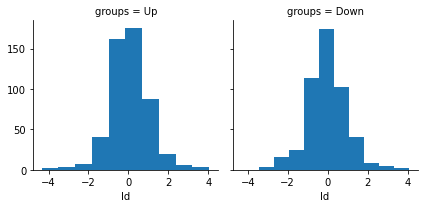

In [25]:
ld_sc = x_train.iloc[:, 0] * result.scalings_[0] + x_train.iloc[:, 1] * result.scalings_[1]

ld = pd.DataFrame({'groups': y_train, 'ld': ld_sc})

g = sns.FacetGrid(ld, col='groups')
g.map(plt.hist, 'ld');

In [26]:
pd.DataFrame({'prob_0': result.predict_proba(x_test)[:, 0], 'prob_1': result.predict_proba(x_test)[:, 1],'pred_class': result.predict(x_test)},columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.490179,0.509821,Up
1,0.479218,0.520782,Up
2,0.466818,0.533182,Up
3,0.474001,0.525999,Up
4,0.492788,0.507212,Up
...,...,...,...
247,0.500589,0.499411,Down
248,0.497221,0.502779,Up
249,0.479199,0.520801,Up
250,0.483167,0.516833,Up


In [27]:
print(confusion_matrix(result.predict(x_test), y_test))

[[ 35  35]
 [ 76 106]]


In [28]:
print(accuracy_score(y_test, result.predict(x_test)))

0.5595238095238095


# Quadratic Discriminant Analysis

In [29]:
model = qda()
result = model.fit(x_train, y_train)

In [30]:
result.priors_

array([0.49198397, 0.50801603])

In [31]:
result.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [32]:
pd.DataFrame({'prob_0': result.predict_proba(x_test)[:, 0], 'prob_1': result.predict_proba(x_test)[:, 1],'pred_class': result.predict(x_test)},columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.487324,0.512676,Up
1,0.475901,0.524099,Up
2,0.463691,0.536309,Up
3,0.473925,0.526075,Up
4,0.490343,0.509657,Up
...,...,...,...
247,0.497670,0.502330,Up
248,0.494787,0.505213,Up
249,0.475864,0.524136,Up
250,0.482695,0.517305,Up


In [33]:
print(confusion_matrix(result.predict(x_test), y_test))

[[ 30  20]
 [ 81 121]]


In [34]:
print(accuracy_score(y_test, result.predict(x_test)))

0.5992063492063492


# K-Nearest Neighbors

In [35]:
model = knn(n_neighbors=1)
result = model.fit(x_train, y_train)

In [36]:
pd.DataFrame({'prob_0': result.predict_proba(x_test)[:, 0], 'prob_1': result.predict_proba(x_test)[:, 1],'pred_class': result.predict(x_test)},columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.0,1.0,Up
1,1.0,0.0,Down
2,0.0,1.0,Up
3,0.0,1.0,Up
4,0.0,1.0,Up
...,...,...,...
247,1.0,0.0,Down
248,1.0,0.0,Down
249,0.0,1.0,Up
250,1.0,0.0,Down


In [37]:
print(confusion_matrix(result.predict(x_test), y_test))

[[43 58]
 [68 83]]


In [38]:
print(accuracy_score(y_test, result.predict(x_test)))

0.5


In [39]:
model = knn(n_neighbors=3)
result = model.fit(x_train, y_train)

In [40]:
print(confusion_matrix(result.predict(x_test), y_test))

[[48 55]
 [63 86]]


In [41]:
print(accuracy_score(y_test, result.predict(x_test)))

0.5317460317460317


# An Application to Caravan Insurance Data

In [42]:
caravan = pd.read_csv('./data/Caravan.csv', index_col=0)
caravan.Purchase = caravan.Purchase.astype('category')
caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5821,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


In [43]:
caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [44]:
caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [45]:
caravan.Purchase.value_counts()['Yes']/len(caravan)

0.05977327378907592

In [46]:
from scipy.stats import zscore

X = caravan.iloc[:, 0:85].apply(zscore)

y = caravan.Purchase

x_train = X.loc[1001:]
y_train = y.loc[1001:]

x_test = X.loc[:1000]
y_test = y.loc[:1000]
model = knn(n_neighbors=1)
result = model.fit(x_train, y_train)

In [47]:
print(confusion_matrix(result.predict(x_test), y_test))

[[873  50]
 [ 68   9]]


In [48]:
print(accuracy_score(y_test, result.predict(x_test)))

0.882


In [49]:
model = knn(n_neighbors=3)
result = model.fit(x_train, y_train)

In [50]:
print(confusion_matrix(result.predict(x_test), y_test))

[[921  54]
 [ 20   5]]


In [51]:
model = knn(n_neighbors=5)
result = model.fit(x_train, y_train)

In [52]:
print(confusion_matrix(result.predict(x_test), y_test))

[[930  55]
 [ 11   4]]


In [53]:
regr = skl_lm.LogisticRegression()
regr.fit(x_train, y_train)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
pred = regr.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)


True        No  Yes
Predicted          
No         934   59
Yes          7    0


In [55]:
pred_p = regr.predict_proba(x_test)
cm_df = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)

Pred   No  Yes
True          
No    917   24
Yes    48   11
